<a href="https://colab.research.google.com/github/GabsGabsz/EstoqueSystem/blob/master/2%C2%B0_prova_Lp_An%C3%A1lise_de_filmes_Grupo_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/armandossrecife/lp20231/main/top-500-movies.csv

--2023-07-18 17:23:53--  https://raw.githubusercontent.com/armandossrecife/lp20231/main/top-500-movies.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69811 (68K) [text/plain]
Saving to: ‘top-500-movies.csv’

top-500-movies.csv  100%[===================>]  68.17K  --.-KB/s    in 0.01s   

2023-07-18 17:23:53 (5.66 MB/s) - ‘top-500-movies.csv’ saved [69811/69811]



# Criando estrutura para armazenar os dados.

In [ ]:
import pandas as pd

df_filmes = pd.read_csv('top-500-movies.csv')

In [ ]:
df_filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             500 non-null    int64  
 1   release_date     499 non-null    object 
 2   title            500 non-null    object 
 3   url              500 non-null    object 
 4   production_cost  500 non-null    int64  
 5   domestic_gross   500 non-null    int64  
 6   worldwide_gross  500 non-null    int64  
 7   opening_weekend  479 non-null    float64
 8   mpaa             492 non-null    object 
 9   genre            495 non-null    object 
 10  theaters         479 non-null    float64
 11  runtime          487 non-null    float64
 12  year             499 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 50.9+ KB


# Fazendo a limpeza dos dados.

## Retirando dados duplicados.

In [ ]:
df_filmes = df_filmes.drop_duplicates()

## Removendo linhas com valores ausentes.

In [ ]:
df_filmes = df_filmes.dropna()

## Resultado da limpeza.

In [ ]:
df_filmes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 498
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             474 non-null    int64  
 1   release_date     474 non-null    object 
 2   title            474 non-null    object 
 3   url              474 non-null    object 
 4   production_cost  474 non-null    int64  
 5   domestic_gross   474 non-null    int64  
 6   worldwide_gross  474 non-null    int64  
 7   opening_weekend  474 non-null    float64
 8   mpaa             474 non-null    object 
 9   genre            474 non-null    object 
 10  theaters         474 non-null    float64
 11  runtime          474 non-null    float64
 12  year             474 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 51.8+ KB


# 1: Quais são características (colunas) que tem maior índice de correlação entre si?
Observação: use o coeficiente de correlação de Pearson como referência.


In [ ]:
df_filmes.corr()

<ipython-input-8-0b66735204f2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filmes.corr()


,rank,production_cost,domestic_gross,worldwide_gross,opening_weekend,theaters,runtime,year
rank,1.000000,-0.920870,-0.474311,-0.508459,-0.518056,-0.538971,-0.221781,-0.303670
production_cost,-0.920870,1.000000,0.506856,0.561523,0.578220,0.497085,0.278572,0.291532
domestic_gross,-0.474311,0.506856,1.000000,0.929819,0.885024,0.542411,0.284350,0.092932
worldwide_gross,-0.508459,0.561523,0.929819,1.000000,0.821172,0.532883,0.335474,0.152554
opening_weekend,-0.518056,0.578220,0.885024,0.821172,1.000000,0.615874,0.261564,0.199897
theaters,-0.538971,0.497085,0.542411,0.532883,0.615874,1.000000,-0.012624,0.491396
runtime,-0.221781,0.278572,0.284350,0.335474,0.261564,-0.012624,1.000000,-0.007508
year,-0.303670,0.291532,0.092932,0.152554,0.199897,0.491396,-0.007508,1.000000


As colunas que têm maior correlação entre si são: (production_cost,opening_weekend),(domestic_gross,worldwide_gross),(opening_weekend,domestic_gross),(theaters,opening_weekend)

# 2. Sobre os custos de produção (production_cost) e arrecadação de bilheteria mundial (worldwide_gross):


## 2.1 Mostre os 20 filmes com maior custo de produção.

In [ ]:
df_20_filmes_maior_custo_producao = df_filmes.sort_values(by='production_cost', ascending=False).head(20)
df_20_filmes_maior_custo_producao

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
0,1,2019-04-23,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,/movie/Pirates-of-the-Caribbean-On-Stranger-Ti...,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011.0
2,3,2015-04-22,Avengers: Age of Ultron,/movie/Avengers-Age-of-Ultron#tab=summary,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015.0
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=...,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0
4,5,2018-04-25,Avengers: Infinity War,/movie/Avengers-Infinity-War#tab=summary,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018.0
5,6,2007-05-24,Pirates of the Caribbean: At World’s End,/movie/Pirates-of-the-Caribbean-At-Worlds-End#...,300000000,309420425,960996492,114732820.0,PG-13,Adventure,4362.0,167.0,2007.0
6,7,2017-11-13,Justice League,/movie/Justice-League-(2017)#tab=summary,300000000,229024295,655945209,93842239.0,PG-13,Action,4051.0,121.0,2017.0
7,8,2015-10-06,Spectre,/movie/Spectre#tab=summary,300000000,200074175,879500760,70403148.0,PG-13,Action,3929.0,148.0,2015.0
9,10,2019-12-18,Star Wars: The Rise of Skywalker,/movie/Star-Wars-The-Rise-of-Skywalker-(2019)#...,275000000,515202542,1072848487,177383864.0,PG-13,Adventure,4406.0,142.0,2019.0
10,11,2018-05-23,Solo: A Star Wars Story,/movie/Solo-A-Star-Wars-Story#tab=summary,275000000,213767512,393151347,84420489.0,PG-13,Adventure,4381.0,135.0,2018.0


## 2.2 Mostre os 20 filmes com maior arrecadação bilheteria mundial.

In [ ]:
df_20_filmes_maior_bilheteria_mundial = df_filmes.sort_values(by='worldwide_gross', ascending=False).head(20)
df_20_filmes_maior_bilheteria_mundial

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
24,25,2009-12-17,Avatar,/movie/Avatar#tab=summary,237000000,785221649,2910370905,77025481.0,PG-13,Action,3461.0,162.0,2009.0
0,1,2019-04-23,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0
48,49,1997-12-18,Titanic,/movie/Titanic-(1997)#tab=summary,200000000,659363944,2207986545,28638131.0,PG-13,Drama,3265.0,194.0,1997.0
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=...,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0
4,5,2018-04-25,Avengers: Infinity War,/movie/Avengers-Infinity-War#tab=summary,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018.0
46,47,2021-12-14,Spider-Man: No Way Home,/movie/Spider-Man-No-Way-Home-(2021)#tab=summary,200000000,814108407,1912775610,260138569.0,PG-13,Action,4336.0,148.0,2021.0
37,38,2015-06-09,Jurassic World,/movie/Jurassic-World#tab=summary,215000000,652306625,1669979967,208806270.0,PG-13,Action,4291.0,124.0,2015.0
14,15,2019-07-11,The Lion King,/movie/Lion-King-The-(Live-Action)-(2019)#tab=...,260000000,543638043,1647778651,191770759.0,PG,Adventure,4802.0,118.0,2019.0
29,30,2012-04-25,The Avengers,/movie/Avengers-The-(2012)#tab=summary,225000000,623357910,1515100211,207438708.0,PG-13,Action,4349.0,143.0,2012.0
89,90,2015-04-01,Furious 7,/movie/Furious-7#tab=summary,190000000,353007020,1514553486,147187040.0,PG-13,Action,4022.0,137.0,2015.0


# 3. Sobre os gêneros dos filmes analisados:

## 3.1 Quais são os gêneros dos 20 filmes com maior custo de produção?

In [ ]:
lista_genre_20_filmes_maior_custo_producao = df_20_filmes_maior_custo_producao['genre'].unique().tolist()
lista_genre_20_filmes_maior_custo_producao

['Action', 'Adventure', 'Musical']

## 3.2 Quais são os gêneros dos 20 filmes com maior bilheteria mundial?

In [ ]:
lista_genre_20_filmes_maior_bilheteria_mundial = df_20_filmes_maior_bilheteria_mundial['genre'].unique().tolist()
lista_genre_20_filmes_maior_bilheteria_mundial

['Action', 'Drama', 'Adventure', 'Musical']

# 4. Qual é a média de arrecadação dos 20 filmes com maior bilheteria mundial?


In [ ]:
df_20_filmes_maior_bilheteria_mundial['worldwide_gross'].mean()

1683804948.85

# 5. Crie um gráfico que represente a distribuição de arrecadação dos 20 filmes com maior bilheteria mundial.



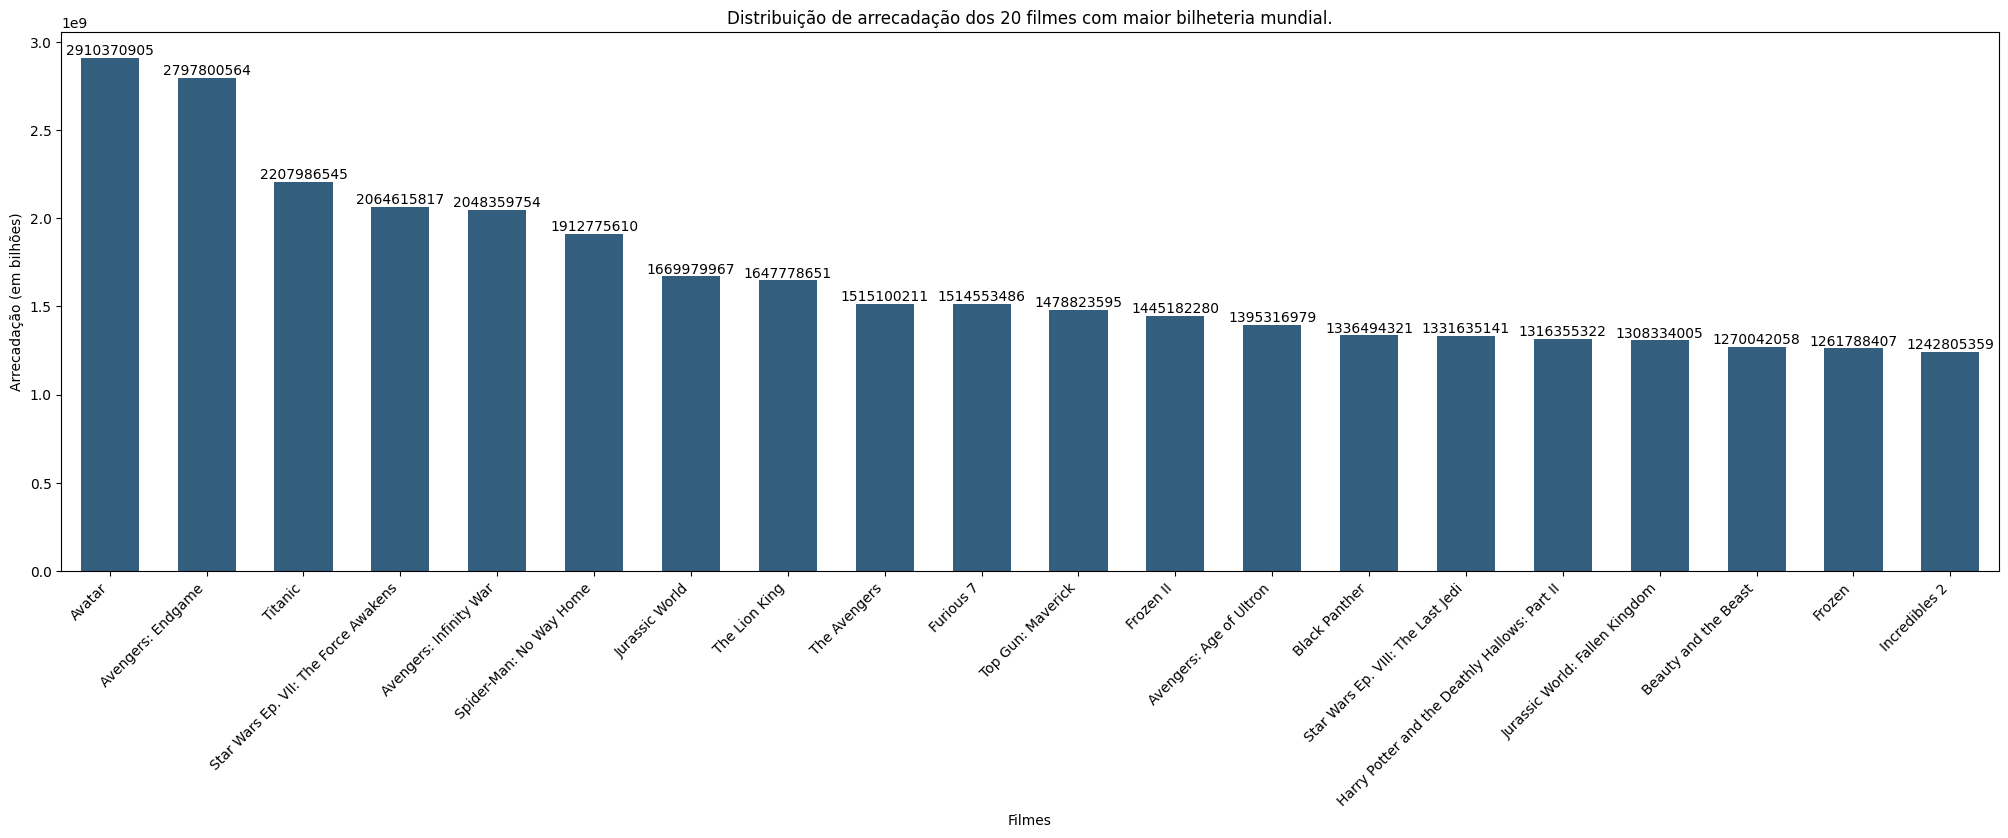

In [ ]:
import matplotlib.pyplot as plt

# Dados de exemplo
x = ['Avatar', 'Avengers: Endgame', 'Titanic', 'Star Wars Ep. VII: The Force Awakens','Avengers: Infinity War','Spider-Man: No Way Home','Jurassic World','The Lion King','The Avengers','Furious 7','Top Gun: Maverick','Frozen II','Avengers: Age of Ultron','Black Panther','Star Wars Ep. VIII: The Last Jedi','Harry Potter and the Deathly Hallows: Part II', 'Jurassic World: Fallen Kingdom', 'Beauty and the Beast','Frozen','Incredibles 2']
y = [2910370905, 2797800564, 2207986545, 2064615817, 2048359754, 1912775610, 1669979967, 1647778651, 1515100211, 1514553486, 1478823595, 1445182280, 1395316979, 1336494321, 1331635141, 1316355322, 1308334005, 1270042058, 1261788407, 1242805359]

# Criar o gráfico de barras
plt.figure(figsize=(25, 7))
cor = '#345E7D'
plt.bar (x, y, width=0.6, color=cor)
plt.xlim(-0.5, len(x)-0.5)
plt.xticks(rotation=45, ha='right')
for i in range(len(x)):
    plt.text(i, y[i], str(y[i]), ha='center', va='bottom')

# Adicionar rótulos e título
plt.xlabel('Filmes')
plt.ylabel('Arrecadação (em bilhões)')
plt.title('Distribuição de arrecadação dos 20 filmes com maior bilheteria mundial.')

# Exibir o gráfico
plt.show()



# 6.Crie um gráfico que mostre o percentual de participação dos 20 filmes com maior arrecadação de bilheteria mundial.



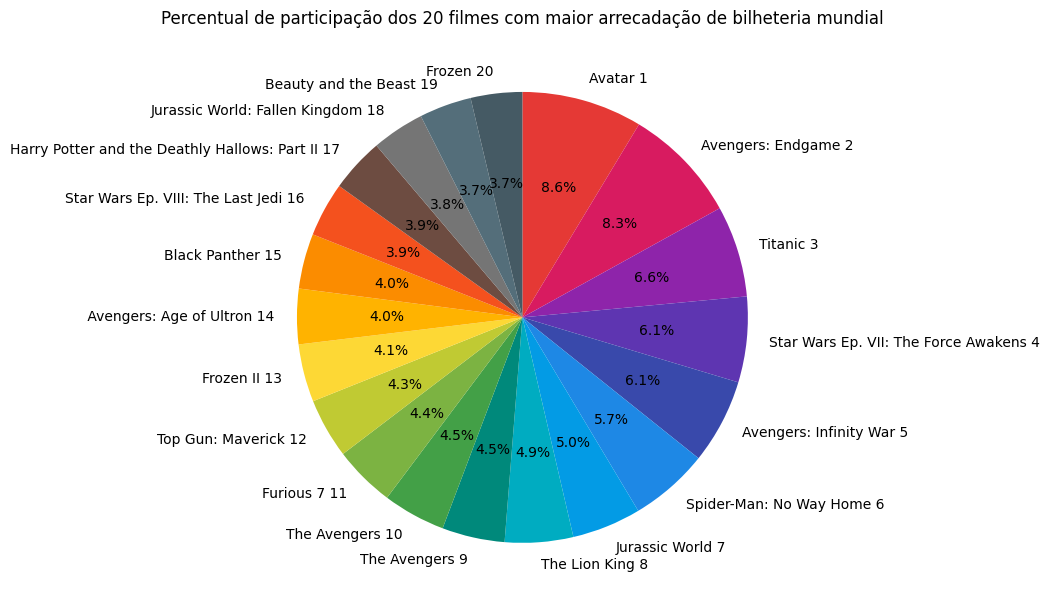

In [ ]:
import matplotlib.pyplot as plt

valores = [2910370905, 2797800564, 2207986545, 2064615817, 2048359754, 1912775610, 1669979967, 1647778651, 1515100211, 1514553486, 1478823595, 1445182280, 1395316979, 1336494321, 1331635141, 1316355322, 1308334005, 1270042058, 1261788407, 1242805359]

soma_total = sum(valores)
porcentagens = [(valor / soma_total) * 100 for valor in valores]

# Dados de exemplo
x = ['Avatar 1', 'Avengers: Endgame 2', 'Titanic 3', 'Star Wars Ep. VII: The Force Awakens 4', 'Avengers: Infinity War 5', 'Spider-Man: No Way Home 6', 'Jurassic World 7', 'The Lion King 8', 'The Avengers 9', 'The Avengers 10', 'Furious 7 11', 'Top Gun: Maverick 12', 'Frozen II 13', ' Avengers: Age of Ultron 14', 'Black Panther 15', 'Star Wars Ep. VIII: The Last Jedi 16', 'Harry Potter and the Deathly Hallows: Part II 17', 'Jurassic World: Fallen Kingdom 18', 'Beauty and the Beast 19', 'Frozen 20']
y = [8.64, 8.30, 6.55, 6.13, 6.08, 5.67, 4.95, 4.89, 4.49, 4.49, 4.39, 4.29, 4.14, 3.96, 3.95, 3.90, 3.88, 3.77, 3.74, 3.69]

# Criar o gráfico de pizza
fig, ax = plt.subplots()
colors = ['#E53935', '#D81B60', '#8E24AA', '#5E35B1', '#3949AB', '#1E88E5', '#039BE5', '#00ACC1', '#00897B', '#43A047', '#7CB342', '#C0CA33', '#FDD835', '#FFB300', '#FB8C00', '#F4511E', '#6D4C41', '#757575', '#546E7A', '#455A64']
fig.subplots_adjust(top=1.3)  # Ajustar espaçamento vertical
plt.pie(y, labels=x, autopct='%1.1f%%', startangle=90,counterclock=False, colors=colors)

# Adicionar título
plt.title('Percentual de participação dos 20 filmes com maior arrecadação de bilheteria mundial')

# Exibir o gráfico
plt.axis('equal')  # Para tornar o gráfico de pizza circular
plt.show()

# 7.Crie um gráfico de série temporal que mostre a evolução do valor total de arrecadação de bilheteria mundial ao longo dos últimos 25 anos. Cada ano deve representar o valor total de arrecadação dos filmes do dataset.

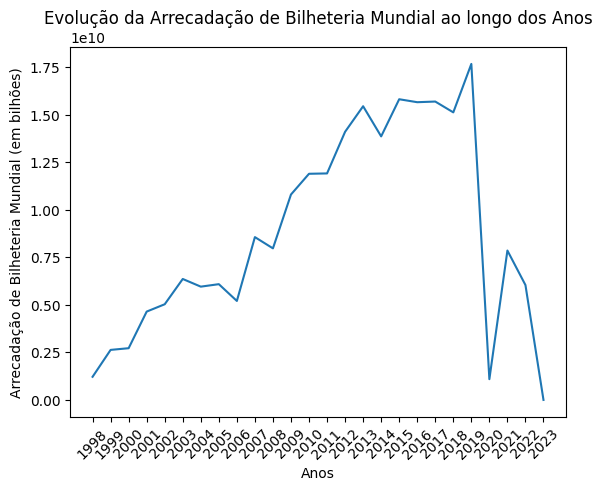

<Figure size 1000x600 with 0 Axes>

In [ ]:

import matplotlib.pyplot as plt

ultimos_25_anos = df_filmes

ano_atual = pd.to_datetime('today').year
ano_inicial = ano_atual - 25
df_ultimos_25_anos = ultimos_25_anos[ultimos_25_anos['year'].between(ano_inicial, ano_atual)]

arrecadacao_por_ano = df_ultimos_25_anos.groupby('year')['worldwide_gross'].sum()

plt.plot(arrecadacao_por_ano.index, arrecadacao_por_ano.values)
plt.xlabel('Anos')
plt.ylabel('Arrecadação de Bilheteria Mundial (em bilhões)')
plt.title('Evolução da Arrecadação de Bilheteria Mundial ao longo dos Anos')

plt.xticks([1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023],rotation = 45)
plt.figure(figsize = (10,6))
# Mostrar o gráfico
plt.show()







## 8.Qual é a média de arrecadação de bilheteria mundial dos 20 filmes de ação com maior bilheteria mundial?


In [ ]:
df_Action = df_filmes[df_filmes['genre'] == 'Action']

df_20_Action = df_Action.sort_values(by='worldwide_gross', ascending=False).head(20)
df_20_Action['worldwide_gross'].mean()


1511815901.9

# 9.Qual é a média de custo de produção dos 20 filmes de aventura com maior bilheteria mundial?

In [ ]:
import pandas as pd

df_Adventure = df_filmes[df_filmes['genre'] == 'Adventure']

df_20_Adventure = df_Adventure.sort_values(by='worldwide_gross', ascending=False).head(20)
df_20_Adventure['worldwide_gross'].mean()

1182959314.85

# 10.Crie um gráfico que agrupe os filmes por gênero e mostre o percentual de participação da bilheteria mundial de todos os filmes do dataset por gênero


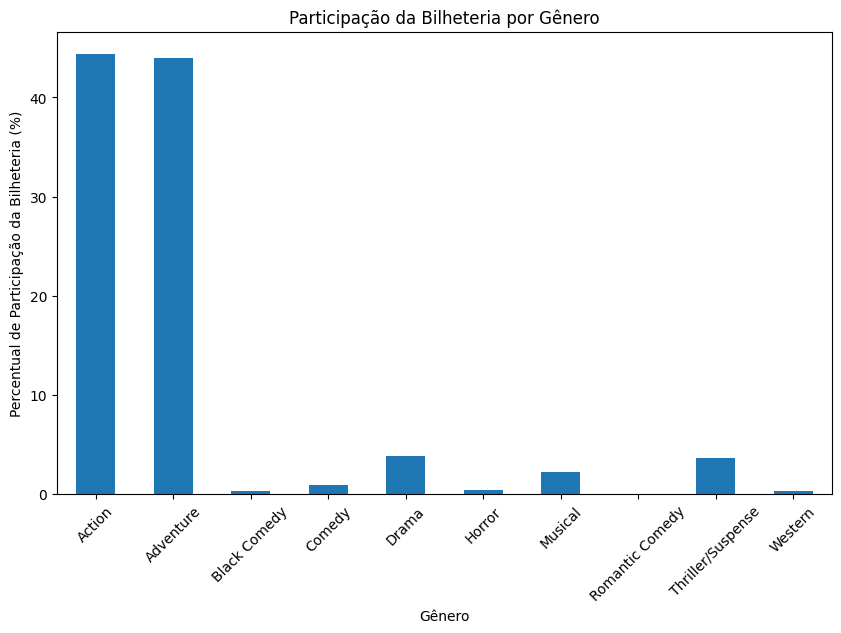

In [ ]:
import matplotlib.pyplot as plt

# Calcular o percentual de participação da bilheteria por gênero
worldwide_gross_por_genero = df_filmes
worldwide_gross_por_genero = df_filmes.groupby('genre')['worldwide_gross'].sum()


total_worldwide_gross = worldwide_gross_por_genero.sum()
percentual_participacao = (worldwide_gross_por_genero / total_worldwide_gross) * 100

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
percentual_participacao.plot(kind='bar')
plt.xlabel('Gênero')
plt.ylabel('Percentual de Participação da Bilheteria (%)')
plt.title('Participação da Bilheteria por Gênero')
plt.xticks(rotation=45)
plt.show()


